# Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading the data

In [9]:
DATA_DIR = 'flowers'
CATEGORIES = os.listdir(DATA_DIR)
HEIGHT = 100
WIDTH = 100
CHANNEL = 3
data = []

for category in CATEGORIES:
    path = os.path.join(DATA_DIR,category)
    cat = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img),CHANNEL)
            new_array = cv2.resize(img_array, (HEIGHT,WIDTH))
            data.append([new_array,cat])
        except Exception as E:
            pass

In [10]:
#checking shape
np.shape(data)

(4323, 2)

# separating feature and label

In [11]:
X = []
Y = []
for feature, label in data:
    X.append(feature)
    Y.append(label)

X = np.array(X)
Y = np.array(Y)

# Plotting some images

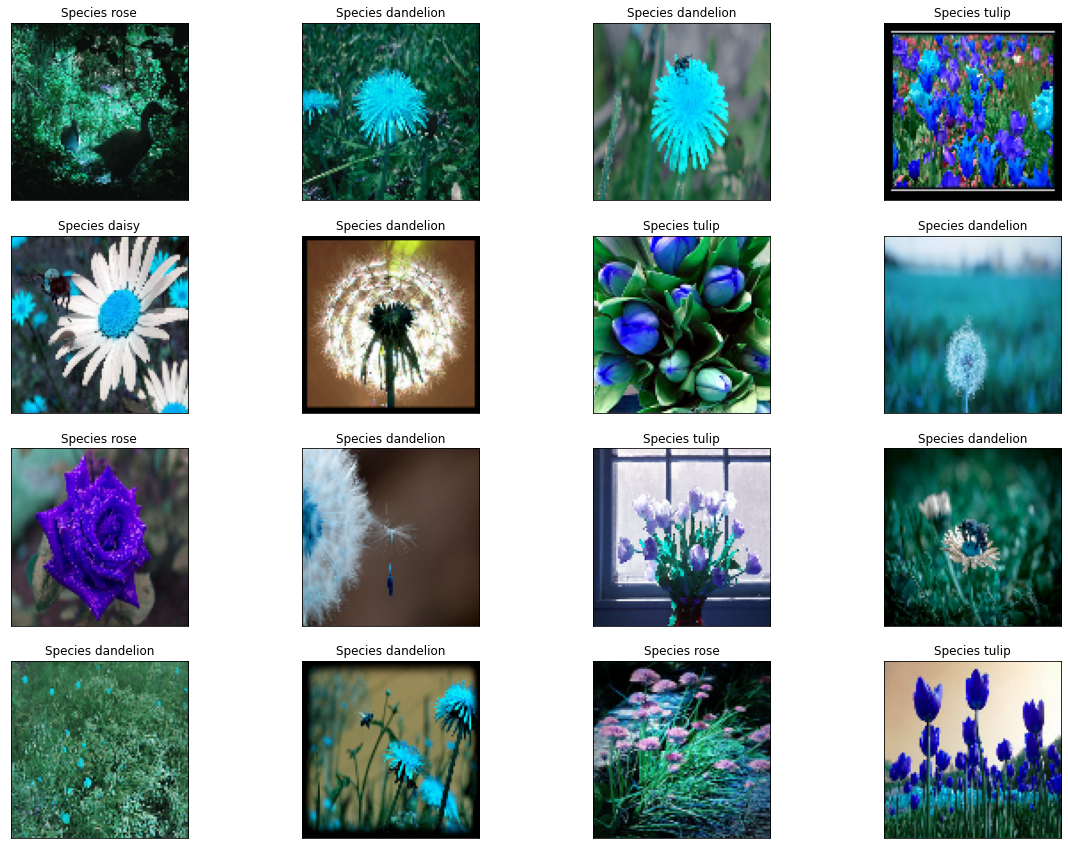

In [12]:


val = np.random.randint(0, X.shape[0], 16)
r = 1
plt.figure(figsize=(20,15))
for value in val:
    
    plt.subplot(4,4,r)
    r += 1
    plt.title('Species '+CATEGORIES[Y[value]])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X[value])
    
plt.show()



# converting labels to categorical value

In [13]:
from keras.utils import to_categorical
Y = to_categorical(Y)

Using TensorFlow backend.


# Spliting the data into test train and validation

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [15]:
#checking shape of training data
np.shape(x_train)

(3458, 100, 100, 3)

In [16]:
# from keras.preprocessing.image import ImageDataGenerator




# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images


# datagen.fit(x_train)

# Model

In [17]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(HEIGHT, WIDTH, CHANNEL)))
model.add(Flatten())
model.add(Dense(625,activation='relu'))
model.add(Dense(125,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

58892288/58889256 [==============================] - 3s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 625)               2880625   
_________________________________________________________________
dense_2 (Dense)              (None, 125)               78250     
_________________________________________________________________
dense_3 (Dense)              (None, 25)                3150      
_________________________________________________________________
dense_4 (Dense)              (None, 15)                390       
_______________________________________________________

# Fitting the data

In [18]:
model.fit(x_train,y_train, batch_size=32, epochs = 50, validation_split=0.1)

Train on 3112 samples, validate on 346 samples
Epoch 1/50
3112/3112 [==============================] - 33s 11ms/step - loss: 2.4138 - accuracy: 0.2487 - val_loss: 1.5995 - val_accuracy: 0.1821
Epoch 2/50
3112/3112 [==============================] - 24s 8ms/step - loss: 1.5692 - accuracy: 0.2898 - val_loss: 1.4546 - val_accuracy: 0.3902
Epoch 3/50
3112/3112 [==============================] - 24s 8ms/step - loss: 1.4891 - accuracy: 0.3352 - val_loss: 1.3672 - val_accuracy: 0.4451
Epoch 4/50
3112/3112 [==============================] - 24s 8ms/step - loss: 1.3086 - accuracy: 0.4168 - val_loss: 1.2365 - val_accuracy: 0.4162
Epoch 5/50
3112/3112 [==============================] - 24s 8ms/step - loss: 1.2320 - accuracy: 0.4508 - val_loss: 1.2908 - val_accuracy: 0.4913
Epoch 6/50
3112/3112 [==============================] - 24s 8ms/step - loss: 1.1917 - accuracy: 0.5003 - val_loss: 1.2088 - val_accuracy: 0.4855
Epoch 7/50
3112/3112 [==============================] - 24s 8ms/step - loss: 1.161

# Predicting value

In [19]:
pred = model.predict(x_test)

# Checking accuracy

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(pred.round(),y_test))

0.7017341040462428


# Plotting training and validation loss

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()